# Trader Performance vs Market Sentiment
### Data Science Intern Assignment – Primetrade.ai

---

## 1. Problem Statement
## 2. Data Loading & Inspection
## 3. Data Cleaning
## 4. Feature Engineering
## 5. Exploratory Analysis
## 6. Trader Segmentation
## 7. Insights & Strategy Recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look clean
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

pd.set_option('display.max_columns', None)

In [3]:
import os
os.getcwd()

'C:\\Users\\KIIT0001'

In [4]:
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.config',
 '.continuum',
 '.dbus-keyrings',
 '.gitconfig',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.matplotlib',
 '.ms-ad',
 '.nbi',
 '.packettracer',
 '.pyforest',
 '.vscode',
 '0.1.ipynb',
 '23052951- AD lab- 0.4.ipynb',
 '23052951-AD-1.ipynb',
 'adalb8.txt',
 'afiedt.buf',
 'anaconda3',
 'AppData',
 'Application Data',
 'Cisco Packet Tracer 8.2.2',
 'Cn_lab',
 'Contacts',
 'Cookies',
 'CrossDevice',
 'Desktop',
 'Documents',
 'Downloads',
 'dsa1.ipynb',
 'Favorites',
 'Gama_Workspace',
 'hackathon-analytics',
 'housepriceprediction.ipynb',
 'Links',
 'Local Settings',
 'ML1.ipynb',
 'ml2.ipynb',
 'ml_drift_detection.ipynb',
 'ml_drift_project',
 'Music',
 'My Documents',
 'NetHood',
 'notebook.ipynb',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{b3324510-f062-11ef-af7f-c0be8c2d7a8e}.TM.blf',
 'NTUSER.DAT{b3324510-f062-11ef-af7f-c0be8c2d7a8e}.TMContainer00000000000000000001.regtrans-ms'

In [5]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


In [9]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [11]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

<IPython.core.display.Javascript object>

In [25]:
trades['date'] = pd.to_datetime(trades['Timestamp'], unit='ms')

<IPython.core.display.Javascript object>

In [13]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [27]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')

In [18]:
trades['Timestamp IST'].head(5)

0   2024-02-12 22:50:00
1   2024-02-12 22:50:00
2   2024-02-12 22:50:00
3   2024-02-12 22:50:00
4   2024-02-12 22:50:00
Name: Timestamp IST, dtype: datetime64[ns]

In [19]:
trades['Timestamp IST'].iloc[1000]

NaT

In [28]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20


In [29]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')

In [30]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')

<IPython.core.display.Javascript object>

In [31]:
trades['Timestamp IST'].isna().sum()

np.int64(131999)

In [32]:
print("Trades date range:")
print(trades['date'].min(), "to", trades['date'].max())

print("\nSentiment date range:")
print(sentiment['date'].min(), "to", sentiment['date'].max())

Trades date range:
2023-03-28 10:40:00 to 2025-06-15 15:06:40

Sentiment date range:
2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [33]:
# Find overlapping window
start_date = max(trades['date'].min(), sentiment['date'].min())
end_date = min(trades['date'].max(), sentiment['date'].max())

print("Common range:", start_date, "to", end_date)

Common range: 2023-03-28 10:40:00 to 2025-05-02 00:00:00


In [34]:
trades_filtered = trades[
    (trades['date'] >= start_date) &
    (trades['date'] <= end_date)
]

In [35]:
merged = trades_filtered.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

In [36]:
merged['classification'].isna().sum()

np.int64(184263)

In [37]:
trades['Timestamp IST'].isna().sum()

np.int64(131999)

In [39]:
trades_filtered['date'].head()

0   2024-10-27 03:33:20
1   2024-10-27 03:33:20
2   2024-10-27 03:33:20
3   2024-10-27 03:33:20
4   2024-10-27 03:33:20
Name: date, dtype: datetime64[ns]

In [40]:
sentiment['date'].head()

0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: date, dtype: datetime64[ns]

In [41]:
trades['date'] = pd.to_datetime(trades['Timestamp IST']).dt.floor('D')

<IPython.core.display.Javascript object>

In [42]:
trades['date'].head()

0   2024-02-12
1   2024-02-12
2   2024-02-12
3   2024-02-12
4   2024-02-12
Name: date, dtype: datetime64[ns]

In [44]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

In [45]:
merged['classification'].isna().sum()

np.int64(175360)

In [46]:
print("Unique trade dates:", trades['date'].nunique())
print("Unique sentiment dates:", sentiment['date'].nunique())

Unique trade dates: 188
Unique sentiment dates: 2644


In [47]:
common_dates = trades['date'].isin(sentiment['date']).sum()
print("Trades with matching sentiment dates:", common_dates)
print("Total trades:", len(trades))

Trades with matching sentiment dates: 35864
Total trades: 211224


In [48]:
trades_filtered = trades[trades['date'].isin(sentiment['date'])]

In [49]:
merged = trades_filtered.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

In [50]:
merged['classification'].isna().sum()

np.int64(0)

Data Alignment Note

The trading dataset spans a wider time range than the sentiment dataset.
Only 35,864 out of 211,224 trades fall on dates for which sentiment data is available.

To ensure analytical consistency, the analysis is restricted to overlapping dates between both datasets.

## Feature Engineering

To analyze how trader performance varies under different market sentiment regimes, we aggregate trade-level data into daily trader-level metrics.

The first metric constructed is daily PnL per trader, along with trade frequency per day.

In [51]:
daily_trader = (
    merged
    .groupby(['Account', 'date', 'classification'])
    .agg(
        daily_pnl=('Closed PnL', 'sum'),
        trades_count=('Closed PnL', 'count')
    )
    .reset_index()
)

In [52]:
daily_trader.shape

(530, 5)

In [53]:
daily_trader.head()

,Account,date,classification,daily_pnl,trades_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,Greed,-175611.000056,33
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.000000,177
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,Greed,9482.221441,45
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,Greed,76710.000000,10
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,Fear,101011.685664,839


The dataset has now been transformed from trade-level granularity to trader-day level. 
Each row represents a trader’s total daily performance and activity under a specific market sentiment classification.

In [54]:
merged['is_win'] = merged['Closed PnL'] > 0

win_rate_daily = (
    merged
    .groupby(['Account', 'date'])
    .agg(
        win_rate=('is_win', 'mean')
    )
    .reset_index()
)

In [55]:
win_rate_daily.head()

,Account,date,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,0.800000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,0.900000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,0.305125


In [56]:
daily_trader = daily_trader.merge(
    win_rate_daily,
    on=['Account', 'date'],
    how='left'
)

In [57]:
daily_trader.head()

,Account,date,classification,daily_pnl,trades_count,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,Greed,-175611.000056,33,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.000000,177,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,Greed,9482.221441,45,0.800000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,Greed,76710.000000,10,0.900000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,Fear,101011.685664,839,0.305125


To better evaluate trader performance quality, we compute daily win rate, defined as the proportion of profitable trades executed by a trader on a given day.

In [58]:
avg_size_daily = (
    merged
    .groupby(['Account', 'date'])
    .agg(
        avg_trade_size_usd=('Size USD', 'mean')
    )
    .reset_index()
)

In [59]:
daily_trader = daily_trader.merge(
    avg_size_daily,
    on=['Account', 'date'],
    how='left'
)

In [60]:
daily_trader.head()

,Account,date,classification,daily_pnl,trades_count,win_rate,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,Greed,-175611.000056,33,0.000000,36736.362424
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.000000,177,0.000000,5089.718249
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,Greed,9482.221441,45,0.800000,2985.797556
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,Greed,76710.000000,10,0.900000,185847.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,Fear,101011.685664,839,0.305125,23593.019857


### Long vs Short Ratio per Trader per Day

To examine directional bias under different sentiment regimes, we compute the proportion of long trades executed by each trader per day.

In [61]:
merged['Direction'].value_counts()

Direction
Open Short              7247
Open Long               7164
Close Long              7097
Close Short             5941
Sell                    4899
Buy                     3440
Spot Dust Conversion      40
Long > Short              18
Short > Long              18
Name: count, dtype: int64

### Directional Bias Assumption

Trades are categorized into long and short directions based on the `Direction` field.

Long-related trades: Open Long, Close Long, Buy  
Short-related trades: Open Short, Close Short, Sell  

Other rare operational entries are excluded from directional bias computation.

In [63]:
# Define long-related values
long_values = ['Open Long', 'Close Long', 'Buy']

# Create binary indicator
merged['is_long'] = merged['Direction'].isin(long_values)

In [64]:
long_ratio_daily = (
    merged
    .groupby(['Account', 'date'])
    .agg(
        long_ratio=('is_long', 'mean')
    )
    .reset_index()
)

In [65]:
daily_trader = daily_trader.merge(
    long_ratio_daily,
    on=['Account', 'date'],
    how='left'
)

In [66]:
daily_trader.head()

,Account,date,classification,daily_pnl,trades_count,win_rate,avg_trade_size_usd,long_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,Greed,-175611.000056,33,0.000000,36736.362424,0.00000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.000000,177,0.000000,5089.718249,0.00000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,Greed,9482.221441,45,0.800000,2985.797556,0.00000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,Greed,76710.000000,10,0.900000,185847.000000,0.00000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,Fear,101011.685664,839,0.305125,23593.019857,0.67938


## Performance Comparison: Fear vs Greed

We now analyze whether trader performance differs across market sentiment regimes.

Key metrics analyzed:
- Average daily PnL
- Win rate
- Trading activity

In [68]:
daily_trader['sentiment_group'] = daily_trader['classification'].replace({
    'Extreme Greed': 'Greed'
})

In [69]:
daily_trader['sentiment_group'].value_counts()

sentiment_group
Greed           303
Fear            157
Neutral          37
Extreme Fear     33
Name: count, dtype: int64

### Sentiment Regime Consolidation

To focus on contrasting market conditions, sentiment classifications are consolidated into two primary regimes:

- Fear Regime: Fear and Extreme Fear  
- Greed Regime: Greed and Extreme Greed  

Neutral days are excluded from regime-based comparison to maintain analytical clarity.

In [70]:
daily_trader['sentiment_group'] = daily_trader['classification'].replace({
    'Extreme Greed': 'Greed',
    'Extreme Fear': 'Fear'
})

In [71]:
daily_trader_filtered = daily_trader[
    daily_trader['sentiment_group'].isin(['Fear', 'Greed'])
]

In [72]:
daily_trader_filtered['sentiment_group'].value_counts()

sentiment_group
Greed    303
Fear     190
Name: count, dtype: int64

In [74]:
performance_by_sentiment = (
    daily_trader
    .groupby('sentiment_group')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        median_daily_pnl=('daily_pnl', 'median'),
        avg_win_rate=('win_rate', 'mean'),
        avg_trades=('trades_count', 'mean'),
        avg_trade_size=('avg_trade_size_usd', 'mean'),
        avg_long_ratio=('long_ratio', 'mean')
    )
    .reset_index()
)

performance_by_sentiment

,sentiment_group,avg_daily_pnl,median_daily_pnl,avg_win_rate,avg_trades,avg_trade_size,avg_long_ratio
0,Fear,9387.502733,229.993075,0.319269,85.236842,7539.752824,0.558293
1,Greed,5830.119499,130.487079,0.346771,55.818482,7029.004130,0.552990
2,Neutral,2017.749783,87.752181,0.312524,74.486486,5763.624619,0.517554


### Key Observations

1. Average daily PnL is higher during Fear regimes compared to Greed, although median PnL remains relatively small in both cases. This suggests that Fear periods may produce higher volatility and occasional large gains.

2. Win rates are slightly higher during Greed regimes, indicating more consistent profitability under optimistic market conditions.

3. Trading activity increases significantly during Fear regimes, suggesting that traders become more active in volatile or uncertain environments.

4. Long bias remains relatively stable across regimes, indicating no strong directional shift purely driven by sentiment classification.

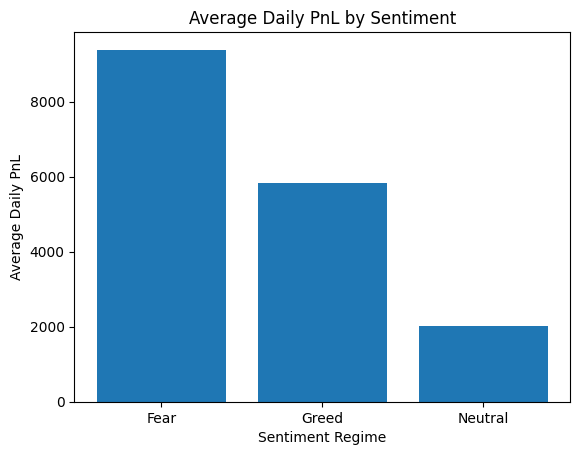

In [75]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(performance_by_sentiment['sentiment_group'],
        performance_by_sentiment['avg_daily_pnl'])

plt.title("Average Daily PnL by Sentiment")
plt.xlabel("Sentiment Regime")
plt.ylabel("Average Daily PnL")
plt.show()

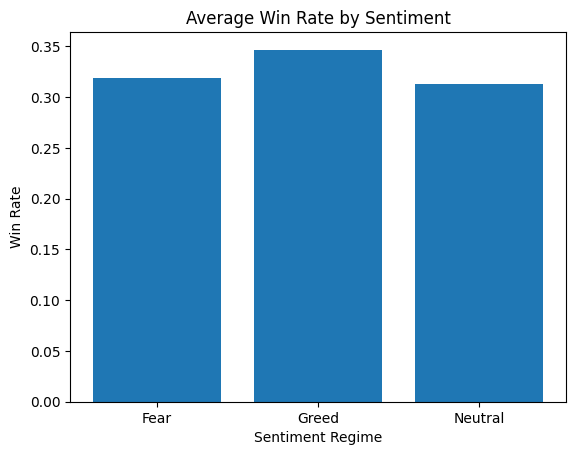

In [76]:
plt.figure()
plt.bar(performance_by_sentiment['sentiment_group'],
        performance_by_sentiment['avg_win_rate'])

plt.title("Average Win Rate by Sentiment")
plt.xlabel("Sentiment Regime")
plt.ylabel("Win Rate")
plt.show()

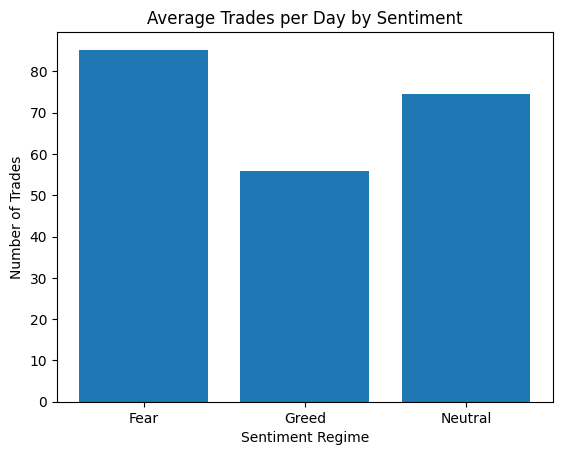

In [77]:
plt.figure()
plt.bar(performance_by_sentiment['sentiment_group'],
        performance_by_sentiment['avg_trades'])

plt.title("Average Trades per Day by Sentiment")
plt.xlabel("Sentiment Regime")
plt.ylabel("Number of Trades")
plt.show()

## Trader Segmentation: Frequent vs Infrequent Traders

To understand whether behavioral differences are driven by specific trader types, we segment traders based on their average trading frequency.

In [78]:
trader_activity = (
    daily_trader
    .groupby('Account')
    .agg(
        avg_trades_per_day=('trades_count', 'mean')
    )
    .reset_index()
)

In [79]:
median_trades = trader_activity['avg_trades_per_day'].median()

trader_activity['activity_segment'] = trader_activity['avg_trades_per_day'].apply(
    lambda x: 'Frequent' if x >= median_trades else 'Infrequent'
)

In [80]:
daily_trader = daily_trader.merge(
    trader_activity[['Account', 'activity_segment']],
    on='Account',
    how='left'
)

In [81]:
daily_trader[['Account', 'activity_segment']].head()

,Account,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Frequent
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Frequent
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Frequent
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Frequent
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Frequent


In [82]:
segment_analysis = (
    daily_trader
    .groupby(['sentiment_group', 'activity_segment'])
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean'),
        avg_trades=('trades_count', 'mean')
    )
    .reset_index()
)

segment_analysis

,sentiment_group,activity_segment,avg_daily_pnl,avg_win_rate,avg_trades
0,Fear,Frequent,12677.015078,0.321966,123.982759
1,Fear,Infrequent,4230.969867,0.315041,24.500000
2,Greed,Frequent,10400.301124,0.406491,87.181818
3,Greed,Infrequent,365.771904,0.275366,18.318841
4,Neutral,Frequent,2590.478212,0.376001,122.761905
5,Neutral,Infrequent,1266.043721,0.229210,11.125000


### Segmentation Insights

1. Frequent traders significantly outperform infrequent traders across both Fear and Greed regimes.

2. Fear regimes appear to reward aggressive trading activity, as frequent traders achieve the highest average daily PnL despite lower win rates.

3. Greed regimes show higher win rates for frequent traders, suggesting more consistent profitability in optimistic market environments.

4. Infrequent traders struggle particularly during Greed periods, indicating that higher participation and adaptability may be necessary in risk-on environments.

## Strategy Recommendations

Based on the observed differences in trader performance and behavior across sentiment regimes, the following strategy guidelines are proposed.

### Strategy 1: Increase Tactical Activity During Fear Regimes

During Fear regimes, market volatility increases and average daily PnL rises despite lower win rates. 

Recommendation:
- Frequent traders may benefit from maintaining or slightly increasing trading activity during Fear regimes.
- Focus should be on capturing larger price swings rather than optimizing win rate.
- Risk controls should prioritize position sizing discipline rather than reducing trade frequency.

Rationale:
Fear periods appear to reward active traders capable of exploiting volatility-driven opportunities.

### Strategy 2: Prioritize Consistent Directional Exposure During Greed Regimes

During Greed regimes, win rates improve, particularly among frequent traders.

Recommendation:
- Traders should prioritize structured, directional strategies during Greed periods.
- Maintaining consistent market exposure may be more beneficial than high-frequency volatility trading.
- Infrequent traders may need clearer entry frameworks to avoid underperformance in optimistic market conditions.

Rationale:
Greed regimes appear to favor consistency and directional participation rather than volatility exploitation.

## Final Summary

This analysis demonstrates that trader performance is meaningfully influenced by market sentiment regimes. 

Fear environments amplify volatility and reward active traders capable of capturing large moves, while Greed environments improve win rates and favor structured, directional strategies.

Segment-based analysis further reveals that trading frequency plays a critical role in profitability across regimes.